In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import geopandas

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Notebook 1

Esercizio 1

In [8]:
stations = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/paris_bike_stations_mercator.gpkg")

In [10]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [13]:
stations.head() #What kind of geometries does this datasets contain? Punti

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)


In [18]:
stations.shape

(1226, 4)

Esercizio 2

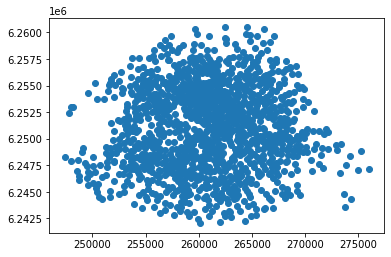

In [19]:
stations.plot()

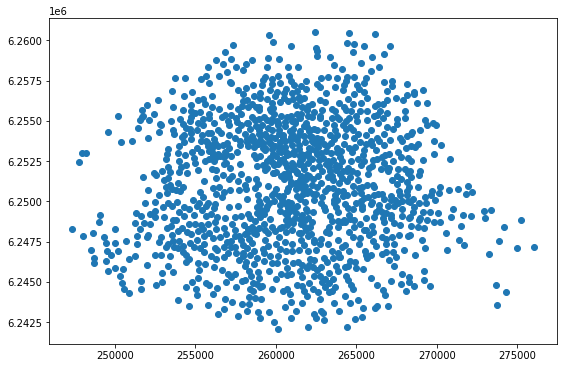

In [21]:
stations.plot(figsize=(12, 6))

Esercizio 3

In [ ]:
!pip install contextily

In [27]:
import contextily

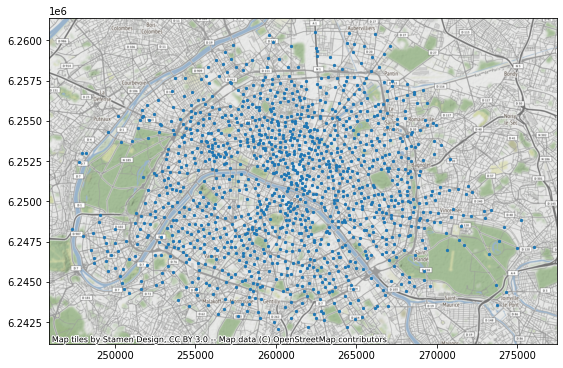

In [122]:
ax = stations.plot(figsize=(12, 6), markersize=5)
contextily.add_basemap(ax)
plt.show()

Esercizio 4

In [41]:
import matplotlib.pyplot as plt

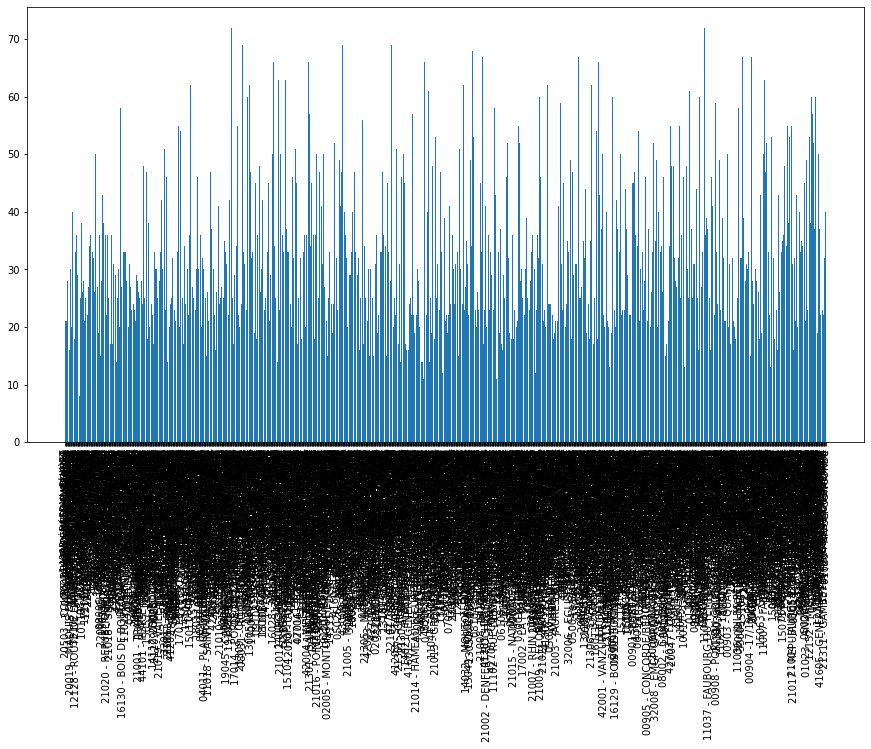

In [42]:
labels = stations['name']
dati = stations['bike_stands']
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Countries')
plt.xticks(rotation=90)
plt.show()

Esercizio 5

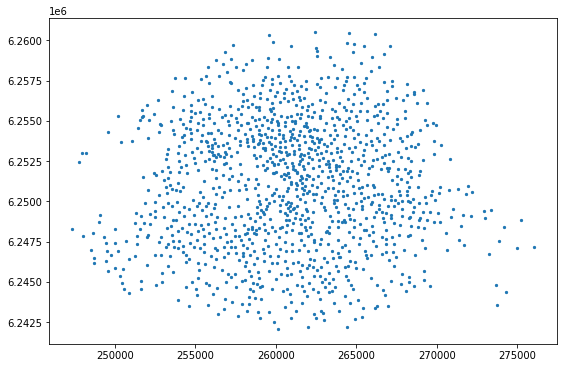

In [47]:
stations.plot(figsize=(12, 6), markersize=5)

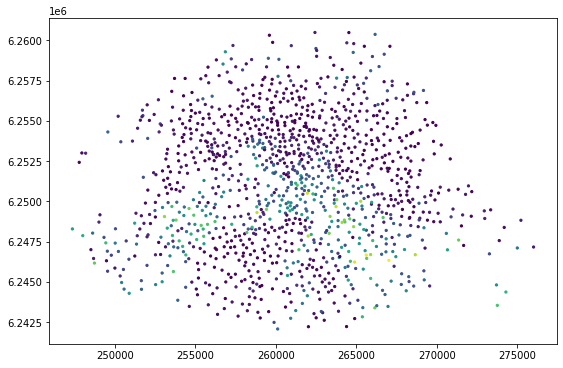

In [48]:
stations.plot(figsize=(12, 6), markersize=5, column='available_bikes')

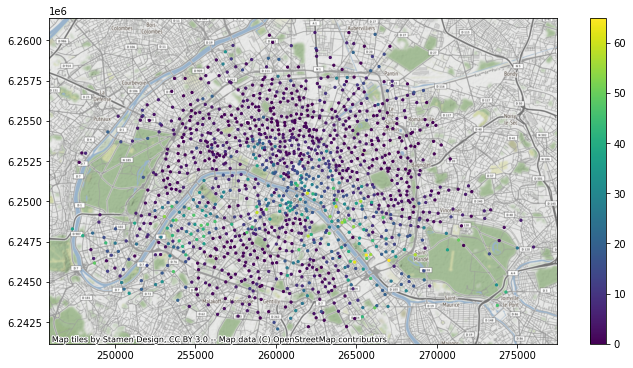

In [123]:
ax = stations.plot(figsize=(12, 6), markersize=5, column='available_bikes', legend=True)
contextily.add_basemap(ax)
plt.show()

Esercizio 6

In [50]:
districts = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/paris_districts_utm.geojson")

In [51]:
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [52]:
districts.shape

(80, 4)

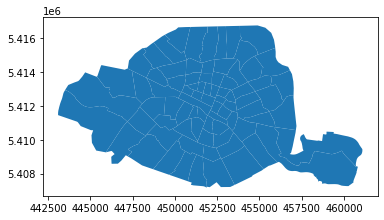

In [54]:
districts.plot()

Esercizio 7

In [56]:
from shapely.geometry import Point, Polygon, LineString

In [57]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [63]:
districts['area'] = districts.geometry.area

In [68]:
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383e+06
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679e+06
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841e+06
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037e+06
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061e+06
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",2.716030e+05
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",2.693111e+05
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",2.434179e+05
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",2.132014e+05


Esercizio 8

In [88]:
districts['population_density'] = districts['population'] / districts['area']*(10**6)
districts

,id,district_name,population,geometry,area,population_density
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5...",8.685379e+05,1925.074371
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5...",4.122371e+05,21793.281432
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5...",2.735494e+05,11679.793285
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",2.693111e+05,11302.915113
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5...",1.879097e+05,7157.691434
...,...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((455155.128 5414359.413, 455239.337 5...",1.294254e+06,30123.911627
76,77,Belleville,35773,"POLYGON ((454767.853 5412865.188, 454761.185 5...",8.061191e+05,44376.817729
77,78,Saint-Fargeau,42087,"POLYGON ((457014.145 5413260.154, 457015.161 5...",1.486139e+06,28319.685707
78,79,Père-Lachaise,42332,"POLYGON ((455648.392 5411702.054, 455580.676 5...",1.598127e+06,26488.507305


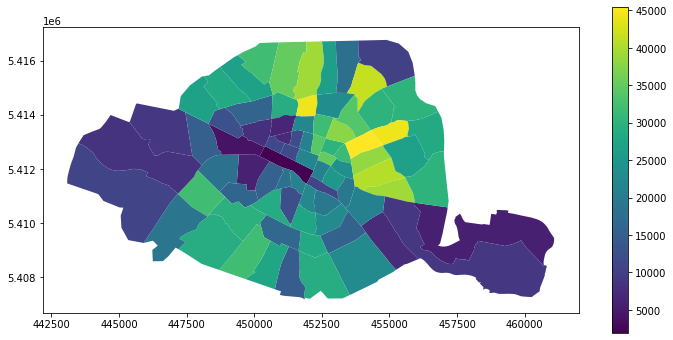

In [89]:
districts.plot(figsize=(12, 6), column='population_density', legend=True)